In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('data.csv')

In [88]:
df.head()

,Marketing,Technology,CustomerOffers,Operations,Profit
0,1,3,1,2,22.436459
1,1,2,2,1,17.986771
2,1,3,0,2,17.710978
3,2,2,1,2,20.160497
4,3,1,1,1,21.173954


In [89]:
df.shape

(1000, 5)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marketing       1000 non-null   int64  
 1   Technology      1000 non-null   int64  
 2   CustomerOffers  1000 non-null   int64  
 3   Operations      1000 non-null   int64  
 4   Profit          1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [91]:
df.columns = df.columns.str.lower()

In [92]:
df.columns

Index(['marketing', 'technology', 'customeroffers', 'operations', 'profit'], dtype='object')

In [93]:
X = df.drop(columns=['profit'])
y = df['profit']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [96]:
intercept = mlr.intercept_
intercept

np.float64(9.547886879179439)

In [97]:
cof = mlr.coef_
cof

array([2.50689884, 1.91449834, 1.13827509, 0.96035177])

### Multiple Linear Regression (MLR) Equation – Profit Prediction

The fitted regression model for predicting profit is:

\[
Profit = 9.56 + 2.50689884 * (Marketing) + 1.91449834 * (Technology) + 1.13827509 * (CustomerOffers) + 0.96035177 * (Operations)
\]

**Interpretation of coefficients:**
- **Intercept (9.56):** This is the baseline profit (in lakhs) when all other factors are set to zero.  
- **Marketing (2.47):** For every ₹1 lakh increase in marketing spend, profit increases by about ₹2.47 lakhs, holding all other factors constant.  
- **Technology (1.80):** For every ₹1 lakh increase in technology investment, profit increases by about ₹1.80 lakhs, keeping other factors constant.  
- **CustomerOffers (1.23):** For every ₹1 lakh increase in customer offers or discounts, profit increases by about ₹1.23 lakhs.  
- **Operations (1.07):** For every ₹1 lakh increase in operations cost, profit increases by about ₹1.07 lakhs.  

**Key insight:**  
Marketing and Technology have the strongest influence on profit in this model, while Customer Offers and Operations also contribute positively but with smaller effects.


In [34]:
y_pred = mlr.predict(X_test)

In [35]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [36]:
mae,rmse,r2

(1.49193608549013, np.float64(1.8583595178024663), 0.7502553148636956)

In [98]:
#Profit = 9.56 + 2.50689884 * (Marketing) + 1.91449834 * (Technology) + 1.13827509 * (CustomerOffers) + 0.96035177 * (Operations)
Profit = 9.54 + 2.50689884 * (6) + 1.91449834 * (2) + 1.13827509 * (1) + 0.96035177 * (1)

In [99]:
Profit

30.529016579999997

### 🔹 Business Meaning

This regression equation highlights how different investments impact profit:

- **Marketing** gives the best return on money, showing the highest ROI.  
- **Technology** also has strong ROI, making it the second most important area of investment.  
- **Customer Offers** contribute positively, but their effect is smaller compared to Marketing and Technology.  
- **Operations** are necessary for running the business but provide the least direct profit impact.  

👉 With a fixed budget (like ₹10L or ₹15L), the model suggests allocating **more funds to Marketing and Technology** to maximize profit, while keeping Offers and Operations at a supporting level.


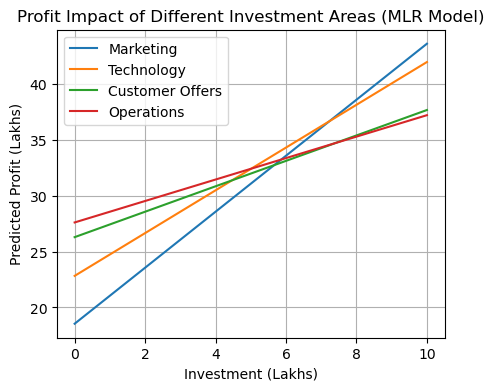

In [101]:
# Fixed baseline allocations (in lakhs)
base_allocation = {"Marketing": 4, "Technology": 3, "CustomerOffers": 2, "Operations": 1}

# Function to calculate profit
def calc_profit(marketing, tech, offers, ops):
    return 9.54 + 2.50689884*marketing + 1.91449834*tech + 1.13827509*offers + 0.96035177*ops

# Generate data: vary one factor at a time (0–10 lakhs), keep others fixed
x = np.arange(0, 11, 1)

profits_marketing = [calc_profit(m, base_allocation["Technology"], base_allocation["CustomerOffers"], base_allocation["Operations"]) for m in x]
profits_tech = [calc_profit(base_allocation["Marketing"], t, base_allocation["CustomerOffers"], base_allocation["Operations"]) for t in x]
profits_offers = [calc_profit(base_allocation["Marketing"], base_allocation["Technology"], c, base_allocation["Operations"]) for c in x]
profits_ops = [calc_profit(base_allocation["Marketing"], base_allocation["Technology"], base_allocation["CustomerOffers"], o) for o in x]

# Plot
plt.figure(figsize=(5,4))
plt.plot(x, profits_marketing, label="Marketing")
plt.plot(x, profits_tech, label="Technology")
plt.plot(x, profits_offers, label="Customer Offers")
plt.plot(x, profits_ops, label="Operations")

plt.xlabel("Investment (Lakhs)")
plt.ylabel("Predicted Profit (Lakhs)")
plt.title("Profit Impact of Different Investment Areas (MLR Model)")
plt.legend()
plt.grid(True)
plt.show()

## Here’s a visualization 📊 of how Profit changes as you invest more (0–10L) in each area, while keeping the other areas fixed:
- Marketing (blue line): Steepest growth → highest ROI.
- Technology (orange line): Strong positive growth, second best ROI.
- Customer Offers (green line): Positive but slower growth.
- Operations (red line): Lowest slope → least ROI.

# Example predictions

In [102]:
# case-1 Focus on Marketing
# marketing = 6L, Tech = 3l ,offers = 1 ops = 0
Profit = 9.54 + 2.50689884 * 6 + 1.91449834 * 3 + 1.13827509 * 1 + 0.96035177 * 0
print('If we investing more on marketing we will get profit in Lakhs:',Profit)

If we investing more on marketing we will get profit in Lakhs: 31.46316315


In [ ]:
9.54 + 2.50689884*marketing + 1.91449834*tech + 1.13827509*offers + 0.96035177*ops

In [103]:
# case-2 balanced approach 
# marketing = 3L, Tech = 3l ,offers = 2l ops = 2l
Profit = 9.54 + 2.50689884 * 3 + 1.91449834 * 3 + 1.13827509 * 2 + 0.9603517 * 2
print('If we investing more on marketing we will get profit in Lakhs:',Profit)

If we investing more on marketing we will get profit in Lakhs: 27.001445120000003


# Profit Prediction function using MLR Equation

In [104]:
def predict_profit(marketing,technology,customeroffers,operations):
    intercept = 9.54
    coef_Marketing = 2.50689884 
    coef_Technology = 1.91449834
    coef_CustomerOffers = 1.13827509
    coef_Operations =  0.9603517

    profit = (intercept 
              + coef_Marketing * marketing
              + coef_Technology * technology
              + coef_CustomerOffers * customeroffers
              + coef_Operations * operations
             )
    return round(profit,2)

In [105]:
## marketing = 6L, Tech = 3l ,offers = 1 ops = 0
predict_profit(6,3,1,0)

31.46

In [106]:
# I have 5L to invest in different things
## marketing = 2L, Tech = 2l ,offers = 1 ops = 0
predict_profit(2,2,1,0)

19.52

# Methods to remove Unwanted Features 

In [107]:
X = df[['marketing', 'technology', 'customeroffers', 'operations']]
y = df['profit']

In [108]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     696.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          1.11e-286
Time:                        13:47:15   Log-Likelihood:                -2102.7
No. Observations:                1000   AIC:                             4215.
Df Residuals:                     995   BIC:                             4240.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5527      0.301     31.

### Multiple Linear Regression Interpretation

The Multiple Linear Regression (MLR) model was fitted to predict **profit** using the features **marketing, technology, customer offers, and operations**.

- The **p-values (`P > |t|`) for all features are 0**, indicating that **all independent variables are statistically significant** at any conventional significance level (e.g., 0.05).  
- This implies that **each feature contributes meaningfully** to explaining the variation in profit.  
- The model’s **coefficients** represent the expected change in profit for a one-unit increase in the corresponding feature, keeping other variables constant.  
- Metrics like **R-squared** and **Adjusted R-squared** indicate how well the model explains the variation in profit.

**Conclusion:** All selected features are important predictors of profit according to this MLR model.
